# Understanding Loss Function and Gradient Descent Method.

  - loss function / 損失関数
  - gradient descent method / 勾配降下法

## Step 0 : Preparation. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Select figure formats for the inline backend.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# Create train data./ 学習用データを生成
# The data is like a paired of height and weight. / 身長と体重をペアにしたようなデータ。
train1 = np.array([[166,58.7], [176,75.7], [171,62.1], [173,70.4], [169,60.1]])
display(train1)

array([[166. ,  58.7],
       [176. ,  75.7],
       [171. ,  62.1],
       [173. ,  70.4],
       [169. ,  60.1]])

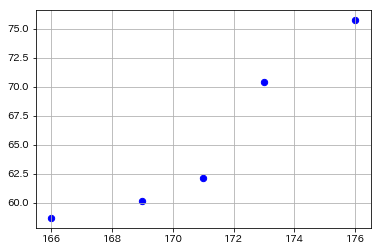

In [2]:
# Show the train data on the scatter chart. / 学習用データを散布図に表示
plt.scatter(train1[:,0], train1[:,1], s=40, c='b')
plt.grid()
plt.show()

## Step 1 : Normalize the array.
配列を正規化

### Calculate the average of each value. / それぞれの値の平均値の計算

In [3]:
mean = train1.mean(axis=0)
display(mean)

array([171. ,  65.4])

### Normalize by subtracting the average value from each value. / それぞれの値から平均値を引いて、正規化する。

In [4]:
train2 = train1 - mean
display(train2)

array([[-5. , -6.7],
       [ 5. , 10.3],
       [ 0. , -3.3],
       [ 2. ,  5. ],
       [-2. , -5.3]])

### Show on a scatter chart. / 散布図上に表示

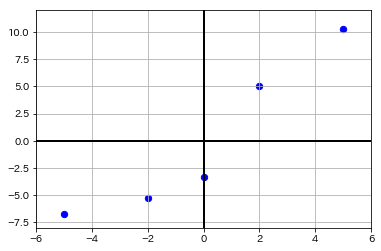

In [5]:
plt.scatter(train2[:,0], train2[:,1], s=40, c='b')
plt.plot([-6,6],[0,0], lw=2, c='k')
plt.plot([0,0],[-8,12], lw=2, c='k')
plt.xlim(-6,6)
plt.ylim(-8,12)
plt.grid()
plt.show()

## Step 2 : Linear single regression analysis
説明変数xから、目的変数yを求める単回帰分析を行う。

Derive an equation that finds the value of ***y*** close to the correct answer by finding the inner product of the two vectors ***w*** and ***x***. / 
***w***と***x***の2つのベクトルの内積を求めることで、正解に近い***y***の値が求まるような式の導出。

$$
    \boldsymbol{w} =
        \left[\begin{array}{c}
            w0 \\
            w1 \\
        \end{array}\right] \quad
    \boldsymbol{x} =
        \left[\begin{array}{c}
            1 \\
            x \\
        \end{array}\right] \quad
$$

$$
    \boldsymbol{y} = \boldsymbol{w} \cdot \boldsymbol{x} =
        \left[\begin{array}{c}
            w0 \\
            w1 \\
        \end{array}\right] \cdot
        \left[\begin{array}{c}
            1 \\
            x \\
        \end{array}\right] =
            \boldsymbol{w0} + \boldsymbol{w1x}
$$




### Create a list of explanatory variable vector ***x***. / 説明変数ベクトル***x***のリストを作成 

In [6]:
x_tmp = train2[:,0:1]
x_array = np.insert(x_tmp, 0, 1.0, axis=1)

display(x_tmp)
display(x_tmp.shape)
display(x_array)
display(x_array.shape)

array([[-5.],
       [ 5.],
       [ 0.],
       [ 2.],
       [-2.]])

(5, 1)

array([[ 1., -5.],
       [ 1.,  5.],
       [ 1.,  0.],
       [ 1.,  2.],
       [ 1., -2.]])

(5, 2)

### Create a list of correct values (objective variables) ***y***. / 正解値(目的変数)***y***のリストを作成

In [7]:
yt = train2[:,1]
display(yt)

array([-6.7, 10.3, -3.3,  5. , -5.3])

### Initialize vaiables. / 変数を初期化

In [8]:
# Total number of x in the x_array. / xの総数 (=5)
M  = x_array.shape[0]

# Number of x dimension. / xの次元数(=2)
D = x_array.shape[1]

# Iteration count. / 繰り返し回数
iters = 200

# Learning rate. / 学習率
alpha = 0.01 

# Initial value of the weight vector.(arbitrary value) / 重みベクトルの初期値 (任意の値)
w = np.array([2, -1])

# For recording evaluation results (Iteration No, Loss function values, w0, w1) / 評価結果記録用 (繰り返し番号, 損失関数値, w0, w1を記録)
history = np.zeros((0,4))

### Execute gradient descent method and calcurate loss function value. / 勾配降下法を実行し、欠損間数値を計算する

In [19]:
for i in range(iters):
    
    # Calculate predicted value using inner product. / 内積を使った予測値の計算
    # e.g. yp = [-9.09863826e+00  9.10825829e+00  4.81001858e-03  3.64618933e+00 -3.63656929e+00]
    yp = x_array @ w
    
    # Calculate difference between predicted value and correnct values. / 誤差の計算
    # e.g. yd = [-2.40280383 -1.19590728  3.30064444 -1.35797624  1.65926513]
    yd = yp - yt
    
    # Execute gradient descent method. / 勾配降下法の実装
    # e.g. w = [1.14524580e-05 1.82068966e+00]
    w = w - alpha * (x_array.T @ yd) / M
    
    # Store data for learning curve. / 学習曲線描画用データの保存
    w0 = float(w[0])
    w1 = float(w[1])
    L = np.mean(yd ** 2) / 2 # Loss function value.
    line = np.array([i, L, w0, w1])
    history = np.vstack((history, line))
    
display(history[:5])

array([[ 0.        , 50.416     ,  1.98      , -0.6728    ],
       [ 1.        , 40.29116307,  1.9602    , -0.3835552 ],
       [ 2.        , 32.37114247,  1.940598  , -0.1278628 ],
       [ 3.        , 26.17424616,  1.92119202,  0.09816929],
       [ 4.        , 21.32404985,  1.9019801 ,  0.29798165]])